
# Actividad 1: Proyecto de Python

 ###  Elección del conjunto de datos

El conjunto de datos seleccionado hace referencia a la calidad del sueño de la poblacion en general, el cual incluye diferentes variables categoricas y numericas referentes a estilo de vidad, salud y generales descriptivas.

El tema de la calidad del sueño es muy poco debatido por el publico en general y este puede tener una alta repercusion ya sea positiva o negativa en la calidad de vida de la poblacion en general, con esta investigacion se pretende establecer la relacion entre algunas variables sobre estilo de vida y la calidad de sueño de la muestra de la poblacion tomada y asi determinar cuales son las causas que influyen en la calidad del sueño o si la calidad del sueño en si misma puede influir en otros aspectos de la calidad de vida.

el dataset fue descargado de 
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [67]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [68]:
ds = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
ds

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [69]:
ds.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [70]:
# Conteo de valores nulos
ds.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [71]:
# eliminar registros que contienen valores NULL
ds.dropna()
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


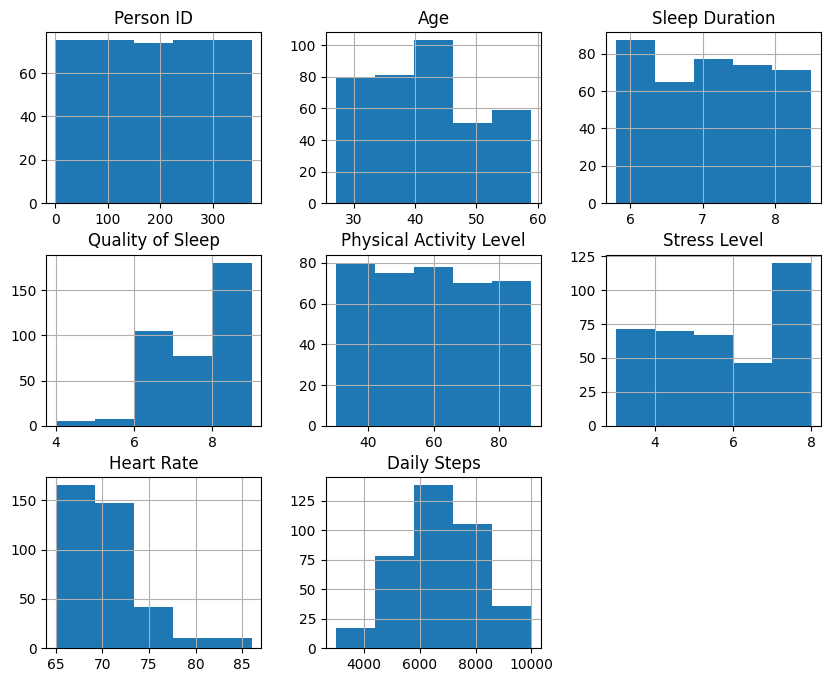

In [72]:
# Crear histogramas para todas las columnas numéricas
ds.hist(bins=5, figsize=(10, 8))

# Mostrar los histogramas
plt.show()

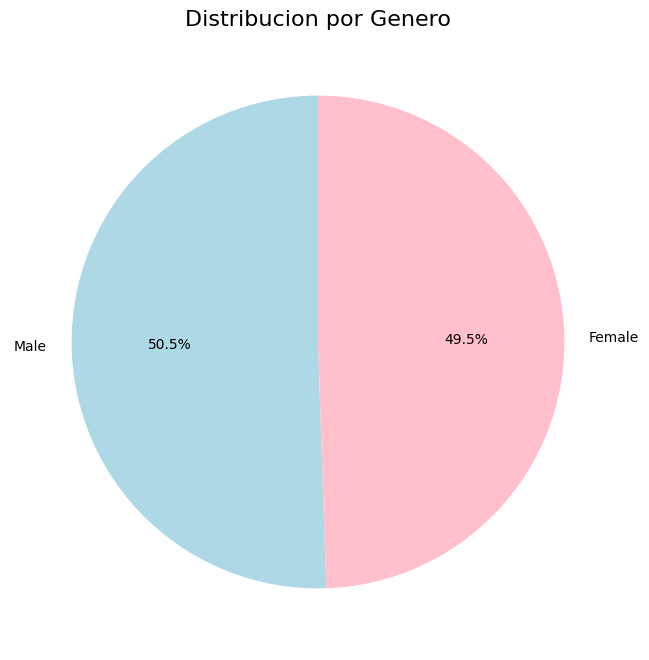

In [73]:
# Distribucion de la poblacion por Genero
plt.figure(figsize=(8, 8))
gender_counts = ds['Gender'].value_counts()

plt.pie(gender_counts, 
        labels=gender_counts.index, 
        autopct='%1.1f%%', 
        colors=['lightblue', 'pink'], 
        startangle=90)

plt.title('Distribucion por Genero', fontsize=16)

plt.show()

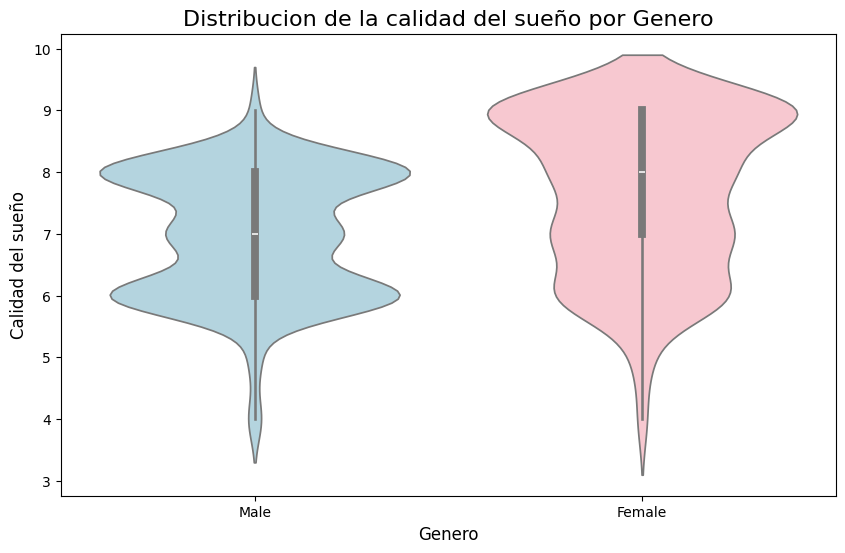

In [74]:
# Distribucion de la calidad del sueño por Genero
color_palette = {'Male': 'lightblue', 'Female': 'pink'}
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Quality of Sleep', data=ds, palette=color_palette)
plt.title('Distribucion de la calidad del sueño por Genero', fontsize=16)
plt.xlabel('Genero', fontsize=12)
plt.ylabel('Calidad del sueño', fontsize=12)
plt.show()

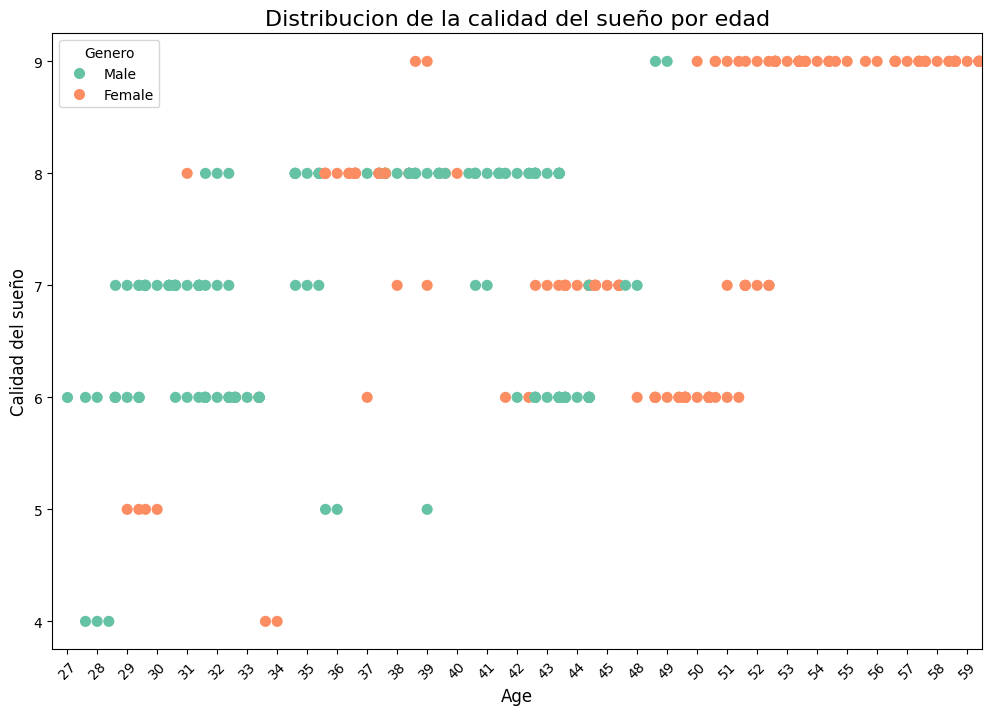

In [75]:
color_palette = sns.color_palette('Set2')
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Age', 
              y='Quality of Sleep', 
              hue='Gender', 
              data=ds, 
              palette=color_palette, 
              size=8)
plt.title('Distribucion de la calidad del sueño por edad', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Calidad del sueño', fontsize=12)
plt.legend(title='Genero', fontsize=10)
plt.xticks(rotation=45)
plt.show()

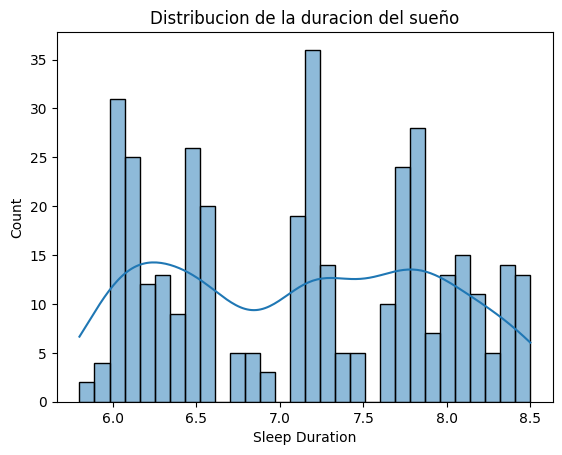

In [76]:
# Distribucion de la duracion del sueño con una Estimación de Densidad por Núcleo para visualizar mas suave y continua de los datos
sns.histplot(ds['Sleep Duration'], bins=30, kde=True)
plt.title('Distribucion de la duracion del sueño')
plt.show()

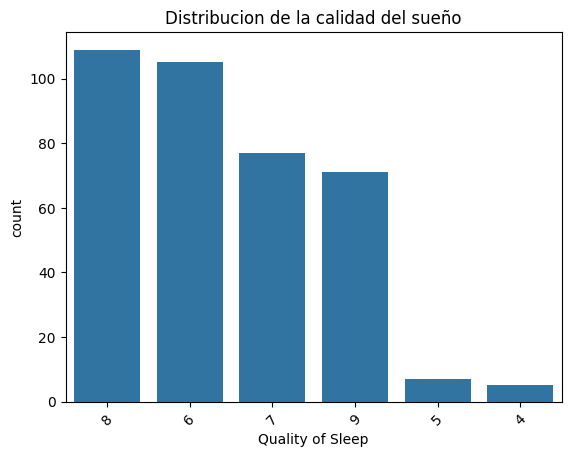

In [77]:
# Distribucion de la calidad del sueño (Conteos)
sns.countplot(x='Quality of Sleep', data=ds, order=ds['Quality of Sleep'].value_counts().index)
plt.title('Distribucion de la calidad del sueño')
plt.xticks(rotation=45)
plt.show()


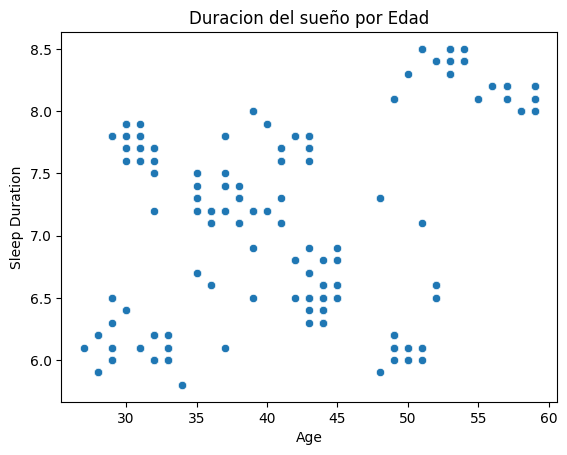

In [78]:
# Diagrama de dispersión para identificar la relacion entre las variables Edad y Duracion del sueño
sns.scatterplot(x='Age', y='Sleep Duration', data=ds)
plt.title('Duracion del sueño por Edad')
plt.show()

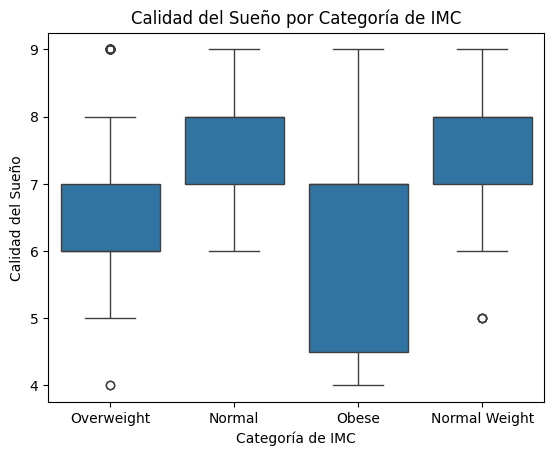

In [79]:
# Relacion entre las variables Calidad de sueño y BMI
sns.boxplot(x='BMI Category', y='Quality of Sleep', data=ds)
plt.title('Calidad del Sueño por Categoría de IMC')
plt.xlabel('Categoría de IMC')
plt.ylabel('Calidad del Sueño')
plt.show()

In [80]:
# Distribucion del nivel de estress sobre el total de la poblacion
fig = px.pie(ds, 
             names='Stress Level', 
             title='Distribucion del nivel de estres')
fig.show()

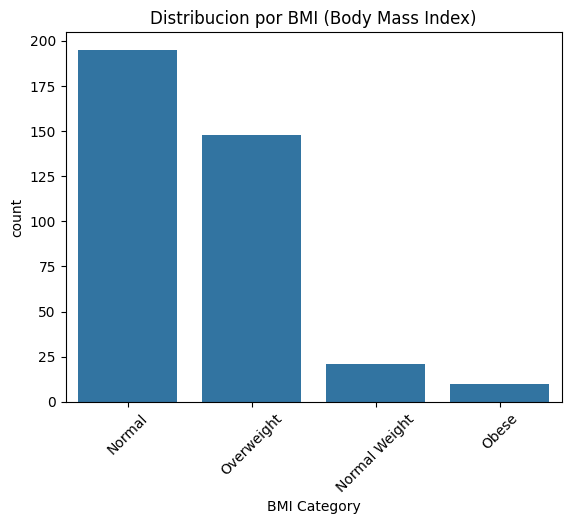

In [81]:
# Distribucion del la poblacion por la Clasificacion del indice de masa corporal
sns.countplot(x='BMI Category', 
              data=ds, 
              order=ds['BMI Category'].value_counts().index
             )
plt.title('Distribucion por BMI (Body Mass Index)')
plt.xticks(rotation=45)
plt.show()

Concluciones

* Se realizo un análisis de tipo Exploratorio del dataset para conocer a detalle las distintas variables y como estas pueden afectar la calidad del sueño de la poblacion de muestra, las cuales se pueden medir en funcion de: Edad, Nivel de Estres, Clasificacion del Indice de Masa Corporal, Cantidad de pasos que la persona realiza de forma diaria, Genero etc.


* Al validar la relación entre las diferentes variables, en este dateset podemos ver una correlación positiva lo cual significa que cada una de las variables afecta de manera directa a la variable objetivo del ejercicio que es la calidad del sueño, identificando factores como un mayor nivel de BMI (Clasificacion del Indice de masa corporal) o la edad afectan negativamente a la calidad del sueño de la poblacion.